# Exercise- Part 2

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import data

In [2]:
# Defining path
path=r'C:\Users\ponni\Achievement 4'

In [3]:
# Import merged data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_1.pkl'))

# 3. Create Visualisations

#### 1. Bar chart

In [5]:
# checking the 'order_dow' column
df_merged['order_dow'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_dow, dtype: int64

In [6]:
# creating result loop 
result=[]

for value in df_merged['order_dow']:
    if value==0:
        result.append('Sunday')
    elif value==1:
        result.append('Monday')
    elif value==2:
        result.append('Tuesday')
    elif value==3:
        result.append('Wednesday')
    elif value==4:
        result.append('Thursday')
    elif value==5:
        result.append('Friday')
    elif value==6:
        result.append('Saturday')

In [7]:
df_merged['day_order'] = result

In [8]:
df_merged['day_order'].value_counts(dropna=False)

Sunday       6204182
Monday       5660230
Saturday     4496490
Tuesday      4213830
Friday       4205791
Wednesday    3840534
Thursday     3783802
Name: day_order, dtype: int64

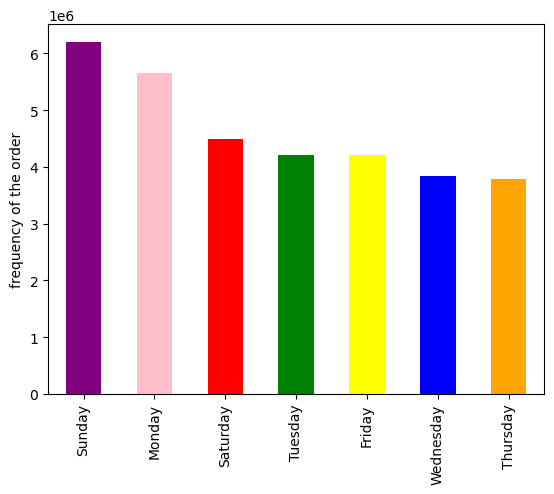

In [12]:
# Create coloured bar chart
bar=df_merged['day_order'].value_counts().plot.bar(color=['purple', 'pink', 'red', 'green', 'yellow', 'blue', 'orange']).set_ylabel('frequency of the order')

In [13]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_r1.png'))

#### 2. Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

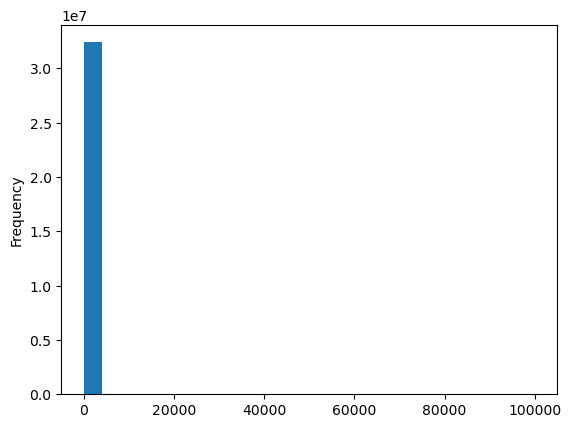

In [8]:
# Create Histograms
df_merged['prices'].plot.hist(bins = 25)

In [9]:
df_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

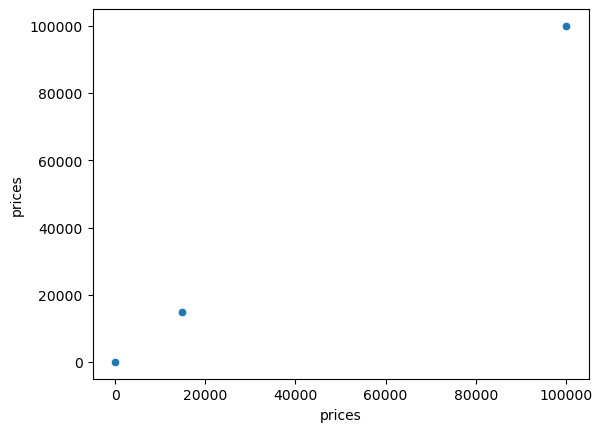

In [15]:
# Create scatterplot
scatterplot= sns.scatterplot(x = 'prices', y = 'prices',data = df_merged)

In [16]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatterplot_df_merged_prices.png'))

In [11]:
# checking for outliers in the dataframe
outlier_prices=df_merged.loc[df_merged['prices'] > 200]

In [12]:
outlier_prices['prices'].value_counts()

14900.0    4429
99999.0     698
Name: prices, dtype: int64

In [13]:
outlier_prices[['prices','order_id','user_id','order_number']]

,prices,order_id,user_id,order_number
7805,14900.0,1435153,1519,26
7806,14900.0,1066435,1519,32
15143,14900.0,1697208,2409,33
20264,99999.0,965345,3531,27
20497,14900.0,2943740,3793,1
...,...,...,...,...
32303799,99999.0,3265389,51346,4
32307882,99999.0,1179092,131671,12
32310810,99999.0,1226705,39667,7
32330048,99999.0,3000037,95105,2


In [14]:
# turning these odd prices into nan
df_merged.loc[df_merged['prices'] >200, 'prices'] = np.nan

In [15]:
df_merged['prices'].max()

25.0

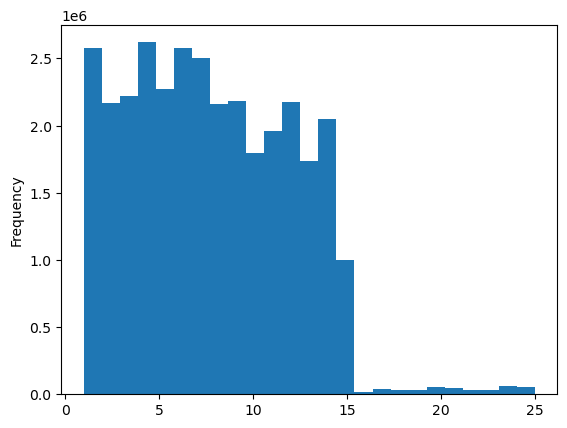

In [16]:
# Histogram
hist=df_merged['prices'].plot.hist(bins = 25)

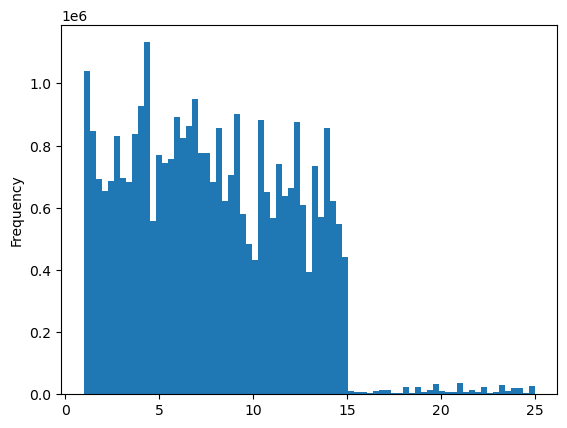

In [17]:
hist_2=df_merged['prices'].plot.hist(bins = 75)

In [18]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_df_merged_prices.png'))

#### 4. Create line chart

In [6]:
# Sampling data
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [9]:
big = df_merged[dev]
small = df_merged[~dev]

In [10]:
len(df_merged)

32404859

In [11]:
len(big)+len(small)

32404859

In [12]:
df_2 = small[['order_dow','prices']]

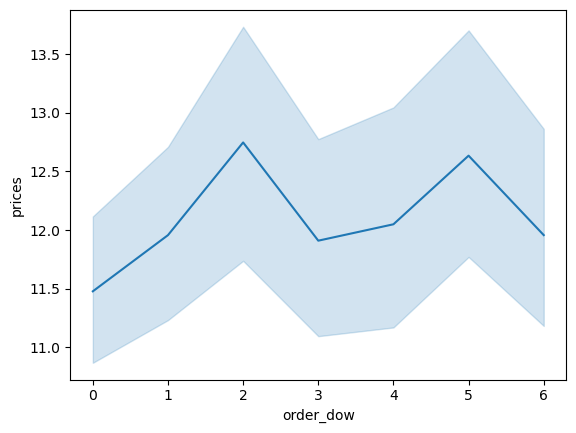

In [13]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [17]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_df_merged_orderdow.png'))

# 4. Export data

In [18]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_2.pkl'))